<a href="https://colab.research.google.com/github/ryan1234814/-Simple-Food-recommendation-chatbot/blob/main/honours_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub

In [24]:
import pandas as pd
from kagglehub import KaggleDatasetAdapter

file_path = "Film_Locations_in_San_Francisco_20250628.csv"

df = pd.read_csv(file_path)

df.head()

,Title,Release Year,Locations,Fun Facts,Production Company,Distributor,Director,Writer,Actor 1,Actor 2,...,Point,Longitude,Latitude,Analysis Neighborhood,Supervisor District,data_as_of,data_loaded_at,SF Find Neighborhoods,Analysis Neighborhoods,Current Supervisor Districts
0,"Murder in the First, Season 3",2016,600 Octavia Street,NaN,Turner North Center Productions,Turner Network Television (TNT),Steven Bochcho,Eric Lodal,Taye Diggs,Kathleen Robertson,...,POINT (-122.4247155 37.7778237),-122.424716,37.777824,Hayes Valley,5.0,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM,22.0,9.0,11.0
1,Terminator - Genisys,2015,"Mission St., Embarcadero, and Front between Cl...",NaN,T5 Productions LLC,Paramount Pictures,Alan Taylor,James Cameron,Arnold Schwarzenegger,Jason Clarke,...,POINT (-122.3936136 37.7954425),-122.393614,37.795443,Financial District/South Beach,3.0,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM,108.0,8.0,3.0
2,Terminator - Genisys,2015,Powell St at Geary St,NaN,T5 Productions LLC,Paramount Pictures,Alan Taylor,James Cameron,Arnold Schwarzenegger,Jason Clarke,...,POINT (-122.4082534 37.7873806),-122.408253,37.787381,Tenderloin,3.0,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM,19.0,36.0,3.0
3,Faces of Death,1978,NaN,NaN,F.O.D Productions,Aquarius Releasing,Conan Le Cilaire,Alan Black,Michael Carr,NaN,...,NaN,NaN,NaN,NaN,NaN,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM,NaN,NaN,NaN
4,Chance- Season 1 ep103,2016,60 Potomac,NaN,TVM Productions,HULU,Michael Lehmann,Kem Nunn,Hugh Laurie,Gretchen Mol,...,POINT (-122.4324326 37.7701803),-122.432433,37.770180,Haight Ashbury,8.0,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM,28.0,3.0,5.0


DATA PREPROCESSING

In [26]:
print("initial shape",df.shape)

initial shape (2084, 21)


In [25]:
print("MISSING VALUES FOR EACH COLUMN\n")
print(df.isnull().sum())

MISSING VALUES FOR EACH COLUMN

Title                              0
Release Year                       0
Locations                         54
Fun Facts                       1620
Production Company                 2
Distributor                      139
Director                           5
Writer                            10
Actor 1                            4
Actor 2                           93
Actor 3                          472
Point                            103
Longitude                        103
Latitude                         103
Analysis Neighborhood            161
Supervisor District              161
data_as_of                         0
data_loaded_at                     0
SF Find Neighborhoods            159
Analysis Neighborhoods           165
Current Supervisor Districts     160
dtype: int64


In [27]:
categorical_cols=df.select_dtypes(include=['object']).columns
df[categorical_cols]=df[categorical_cols].fillna("Unknown")
df[categorical_cols]

,Title,Locations,Fun Facts,Production Company,Distributor,Director,Writer,Actor 1,Actor 2,Actor 3,Point,Analysis Neighborhood,data_as_of,data_loaded_at
0,"Murder in the First, Season 3",600 Octavia Street,Unknown,Turner North Center Productions,Turner Network Television (TNT),Steven Bochcho,Eric Lodal,Taye Diggs,Kathleen Robertson,Ian Anthony Dale,POINT (-122.4247155 37.7778237),Hayes Valley,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM
1,Terminator - Genisys,"Mission St., Embarcadero, and Front between Cl...",Unknown,T5 Productions LLC,Paramount Pictures,Alan Taylor,James Cameron,Arnold Schwarzenegger,Jason Clarke,Unknown,POINT (-122.3936136 37.7954425),Financial District/South Beach,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM
2,Terminator - Genisys,Powell St at Geary St,Unknown,T5 Productions LLC,Paramount Pictures,Alan Taylor,James Cameron,Arnold Schwarzenegger,Jason Clarke,Unknown,POINT (-122.4082534 37.7873806),Tenderloin,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM
3,Faces of Death,Unknown,Unknown,F.O.D Productions,Aquarius Releasing,Conan Le Cilaire,Alan Black,Michael Carr,Unknown,Unknown,Unknown,Unknown,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM
4,Chance- Season 1 ep103,60 Potomac,Unknown,TVM Productions,HULU,Michael Lehmann,Kem Nunn,Hugh Laurie,Gretchen Mol,Ethan Suplee,POINT (-122.4324326 37.7701803),Haight Ashbury,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079,Quitters,24 Hill St.,Unknown,"Frederick & Ashbury, LLC.",Unknown,Noah Pritzker,Noah Pritzker,Kara Hayward,Mira Sorvino,Saffron Burrows,POINT (-122.422249 37.7562552),Mission,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM
2080,The Phone/Jexi,Hyde btwn Jefferson and Broadway - Cable Car Line,Unknown,CBS Films Inc.,Lionsgate,"Jon Lucas, Scott Moore","Jon Lucas, Scott Moore",Adam Devine,Alexandra Shipp,Michael Pena,POINT (-122.408346 37.7874795),Tenderloin,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM
2081,Ant-Man and the Wasp,Financial District,VFX and B-roll Shots,"PYM Particles Productions II, LLC",Walt Disney Studios Motion Pictures,Peyton Reed,Chris McKenna,Paul Rudd,Evangeline Lilly,Michael Douglas,POINT (-122.3964729 37.7936658),Financial District/South Beach,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM
2082,The Matrix Resurrections,Montgomery between Washington and Bush,Unknown,"Adobe Pictures, Inc.",Warner Brothers,Lana Wachowski,"Lana Wachowski, David Mitchell, Aleksander Hemon",Keanu Reeves,Keanu Reeves,Neil Patrick Harris,POINT (-122.4036498 37.7951751),Chinatown,2024/12/06 12:17:47 PM,2024/12/18 02:30:38 PM


In [29]:
import numpy as np
numeric_columns=df.select_dtypes(include=np.number).columns
df[numeric_columns]=df[numeric_columns].fillna(df[numeric_columns].mean())


In [31]:
early=df.shape[0]
df.drop_duplicates(inplace=True)
later=df.shape[0]
print("number of rows dropped",early-later)

number of rows dropped 3


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2081 entries, 0 to 2083
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Title                         2081 non-null   object 
 1   Release Year                  2081 non-null   int64  
 2   Locations                     2081 non-null   object 
 3   Fun Facts                     2081 non-null   object 
 4   Production Company            2081 non-null   object 
 5   Distributor                   2081 non-null   object 
 6   Director                      2081 non-null   object 
 7   Writer                        2081 non-null   object 
 8   Actor 1                       2081 non-null   object 
 9   Actor 2                       2081 non-null   object 
 10  Actor 3                       2081 non-null   object 
 11  Point                         2081 non-null   object 
 12  Longitude                     2081 non-null   float64
 13  Latitude

In [35]:
df.shape

(1780, 21)

detect and handle outliers

In [33]:
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers detected.")

    df = df[(df[col] >= lower) & (df[col] <= upper)]
    print(f"{col}: Found {outliers.shape[0]} outliers")

Release Year: 61 outliers detected.
Release Year: Found 61 outliers
Longitude: 188 outliers detected.
Longitude: Found 188 outliers
Latitude: 52 outliers detected.
Latitude: Found 52 outliers
Supervisor District: 0 outliers detected.
Supervisor District: Found 0 outliers
SF Find Neighborhoods: 0 outliers detected.
SF Find Neighborhoods: Found 0 outliers
Analysis Neighborhoods: 0 outliers detected.
Analysis Neighborhoods: Found 0 outliers
Current Supervisor Districts: 0 outliers detected.
Current Supervisor Districts: Found 0 outliers


scaling and normalization


In [36]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=MinMaxScaler()
df_scaled=df.copy()
df_scaled[numeric_columns]=scaler.fit_transform(df[numeric_columns])
standard_scaler=StandardScaler()
df_standard=df.copy()
df_standard[numeric_columns]=standard_scaler.fit_transform(df[numeric_columns])
print("\nData Scaled sample")
print(df_scaled[numeric_columns].head())



Data Scaled sample
   Release Year  Longitude  Latitude  Supervisor District  \
0      0.893939   0.411108  0.446547             0.444444   
1      0.878788   0.782193  0.634377             0.222222   
2      0.878788   0.607522  0.548431             0.222222   
3      0.318182   0.484505  0.493549             0.425897   
4      0.893939   0.319033  0.365062             0.777778   

   SF Find Neighborhoods  Analysis Neighborhoods  Current Supervisor Districts  
0               0.166667                0.200000                      1.000000  
1               0.921053                0.175000                      0.111111  
2               0.140351                0.875000                      0.111111  
3               0.480333                0.440763                      0.413952  
4               0.219298                0.050000                      0.333333  


In [37]:
print("\nData Standard Scaled sample")
print(df_standard.head())


Data Standard Scaled sample
                           Title  Release Year  \
0  Murder in the First, Season 3      0.620318   
1           Terminator - Genisys      0.560498   
2           Terminator - Genisys      0.560498   
3                 Faces of Death     -1.652860   
4         Chance- Season 1 ep103      0.620318   

                                           Locations Fun Facts  \
0                                 600 Octavia Street   Unknown   
1  Mission St., Embarcadero, and Front between Cl...   Unknown   
2                              Powell St at Geary St   Unknown   
3                                            Unknown   Unknown   
4                                         60 Potomac   Unknown   

                Production Company                      Distributor  \
0  Turner North Center Productions  Turner Network Television (TNT)   
1               T5 Productions LLC               Paramount Pictures   
2               T5 Productions LLC               Paramount P

In [39]:
print("\nSummary Statistics:")
print(df[numeric_columns].describe())


Summary Statistics:
       Release Year    Longitude     Latitude  Supervisor District  \
count   1780.000000  1780.000000  1780.000000          1780.000000   
mean    2005.630337  -122.414503    37.784009             4.803635   
std       16.721385     0.014826     0.016203             2.336578   
min     1957.000000  -122.459172    37.735937             1.000000   
25%     1994.000000  -122.420775    37.773529             3.000000   
50%     2015.000000  -122.412276    37.787854             4.833073   
75%     2017.000000  -122.404808    37.796190             6.000000   
max     2023.000000  -122.375359    37.829738            10.000000   

       SF Find Neighborhoods  Analysis Neighborhoods  \
count            1780.000000             1780.000000   
mean               60.537169               18.093986   
std                36.186672               10.710073   
min                 3.000000                1.000000   
25%                25.000000                8.000000   
50%         

In [40]:
for i in numeric_columns:
  print(f"\nColumn {i}")
  print(f"Mean: {df[i].mean()}")
  print(f"Median: {df[i].median()}")
  print(f"Mode: {df[i].mode()}")
  print(f"Variance: {df[i].var()}")
  print(f"Std: {df[i].std()}")



Column Release Year
Mean: 2005.6303370786518
Median: 2015.0
Mode: 0    2015
Name: Release Year, dtype: int64
Variance: 279.6047002797902
Std: 16.721384520421456

Column Longitude
Mean: -122.4145031970354
Median: -122.4122758
Mode: 0   -122.418564
Name: Longitude, dtype: float64
Variance: 0.00021982416484623549
Std: 0.01482646838752356

Column Latitude
Mean: 37.784008669746754
Median: 37.78785365
Mode: 0    37.782233
Name: Latitude, dtype: float64
Variance: 0.00026254062039921704
Std: 0.016203105270262766

Column Supervisor District
Mean: 4.803634594821995
Median: 4.8330733229329175
Mode: 0    3.0
Name: Supervisor District, dtype: float64
Variance: 5.4595977883817435
Std: 2.3365782221834013

Column SF Find Neighborhoods
Mean: 60.537169123011815
Median: 53.0
Mode: 0    106.0
Name: SF Find Neighborhoods, dtype: float64
Variance: 1309.4752528697165
Std: 36.18667230997784

Column Analysis Neighborhoods
Mean: 18.093985924316858
Median: 20.0
Mode: 0    8.0
Name: Analysis Neighborhoods, dtype

VISUALIZATIONS


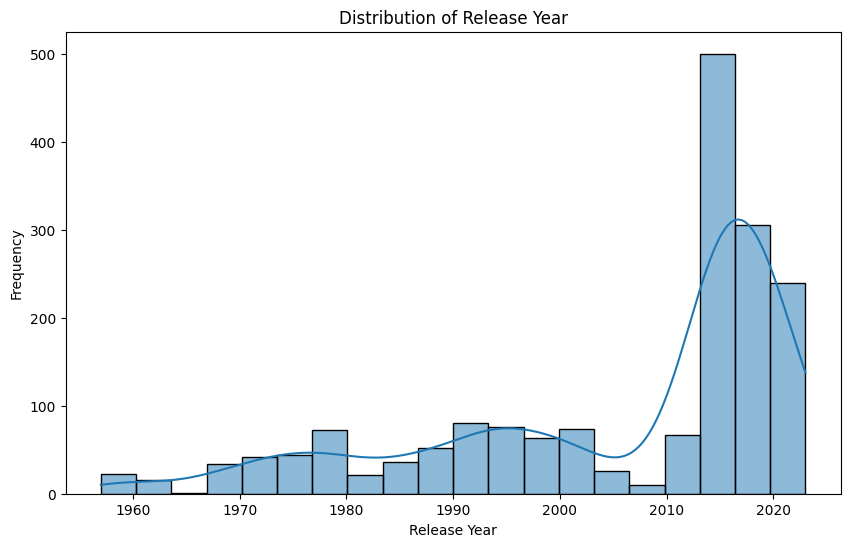

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['Release Year'],bins=20,kde=True)
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()


/tmp/ipython-input-2625837294.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Longitude',y='Latitude',data=df,palette='viridis')


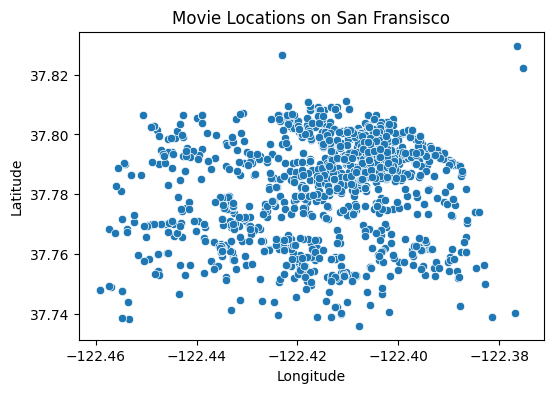

In [42]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Longitude',y='Latitude',data=df,palette='viridis')
plt.title('Movie Locations on San Fransisco')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [44]:
from scipy import stats
contingency=pd.crosstab(df['Analysis Neighborhood'],df['Production Company'])
chi2,p,dof,expected=stats.chi2_contingency(contingency)
print("contingency table")
print(contingency)
print("Chi square test b/w Analysis neighbourhood and production company")
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")


contingency table
Production Company              1492 Pictures  20th Television  \
Analysis Neighborhood                                            
Bayview Hunters Point                       0                0   
Bernal Heights                              0                0   
Castro/Upper Market                         0                0   
Chinatown                                   2                0   
Financial District/South Beach              2                2   
Glen Park                                   0                0   
Golden Gate Park                            0                0   
Haight Ashbury                              1                0   
Hayes Valley                                2                1   
Inner Sunset                                0                0   
Japantown                                   0                0   
Lone Mountain/USF                           0                0   
Marina                                      0             

In [46]:
if p<0.05:
  print("Reject the null hypothesis.Significant relationship exists.")
else:
  print("Fail to reject the null hypothesis")


Reject the null hypothesis.Significant relationship exists.
